In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from itertools import chain
from sys import platform
from copy import deepcopy as dc

vims_wave = np.loadtxt('vims_wave.txt')

new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']

if platform == 'darwin' or platform == 'win32':
    for number in new_array:
        new_string = 'df'+number+' = pd.read_pickle("c_data/data'+number+'.pkl")'
        exec(new_string)
else:
    df_list = []
    for number in new_array:
        new_string = 'df'+number+' = pd.read_csv("c_data/data'+number+'.csv")'
        exec(new_string)
        df = 'df'+number
        new_df = locals()[df]
        df_list.append(new_df)
    for df in df_list:
        for i in range(len(df['spectrum'])):
            df['spectrum'][i] = np.array([float(x) for x in df['spectrum'][i][1:-1].split(',')])

def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

def flatten(some_list,repeat): #! Fix this function
    for i in range(repeat):
        flat_list = []
        for element in some_list:
            if type(element) is list:
                for item in element:
                    flat_list.append(item)
            else:
                flat_list.append(element)
    return flat_list

band_channels = list(chain(range(29,35),range(46,60),range(78,96),range(102,106)))

window = list(range(56,83))

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

def single_fit(spectrum):
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectrum[band_channels],p0=[.15,-12])
    final_spectrum = spectrum-powerlaw(vims_wave,*my_fit)

def shift_ret(spectrum):
    my_fit,_ = curve_fit(gaussian,vims_wave[window],spectrum[window],p0=[.05,2.05])
    return my_fit[1]

#### Plot incidence, emission, latitude, and longitude

- Figure out how to make all scatter lists into one

In [10]:
scatter_list = []
for number in new_array:
    my_string = 'scatter'+number+" = df"+number+"[['emission','incidence','latitude','longitude']]"
    exec(my_string)
    scatter = 'scatter'+number
    scatter_list.append(locals()[scatter])

total_scatter = pd.concat(scatter_list)

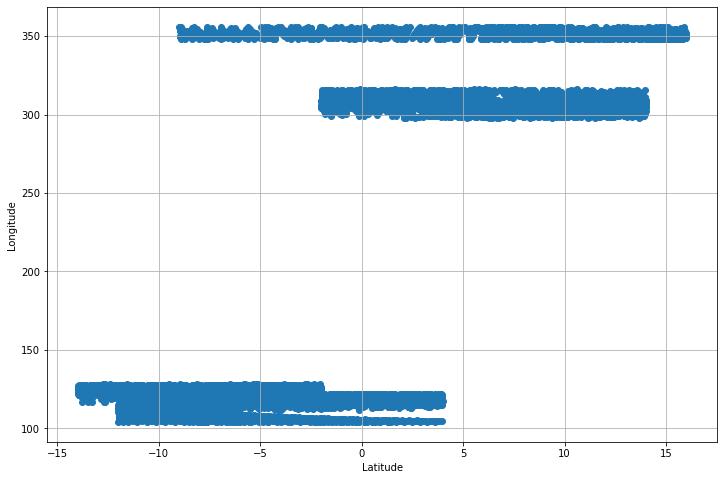

In [11]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(12,8),facecolor='white')
ax.scatter(total_scatter['latitude'],total_scatter['longitude'])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.grid(True)
plt.show()

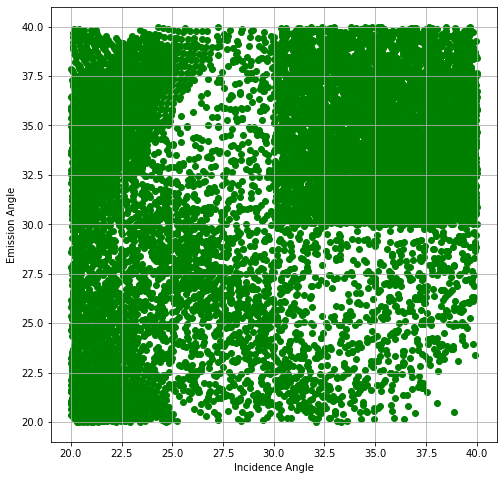

In [19]:
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize=(8,8),facecolor='white')
ax.scatter(total_scatter['incidence'],total_scatter['emission'],color='green')
ax.set_xlabel('Incidence Angle')
ax.set_ylabel('Emission Angle')
ax.grid(True)
plt.show()

In [25]:
incidence = total_scatter['incidence']
emission = total_scatter['emission']
airmass = (1/np.cos(incidence))+(1/np.cos(emission))

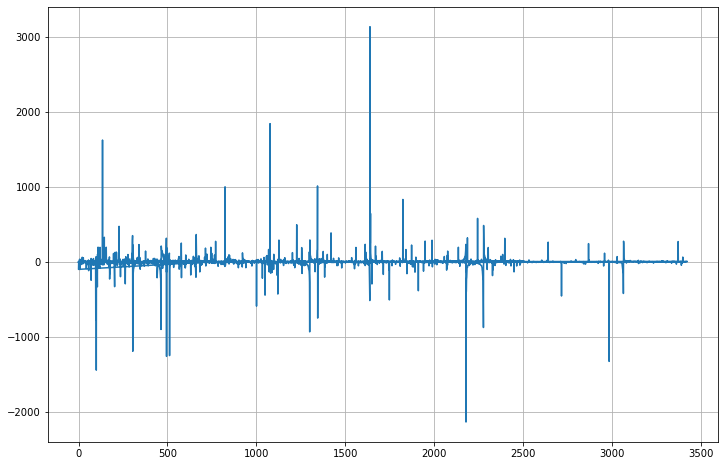

In [29]:
%matplotlib inline
plt.figure(facecolor='white',figsize=(12,8))
plt.plot(airmass)
plt.grid()
plt.show()